# Análisis Cinemático del Manipulador RR
*Práctica 1. Robótica Industrial*

## Introducción a Jupyter Notebook
Antes de esta práctica, el profesor de prácticas os enseñará como instalar la distribución de python **Anaconda** en Windows, Linux o Mac, y cómo habilitar y lanzar un notebook de Jupyter. 

[Jupyter](https://jupyter.org) (anteriormente conocido como iPython notebook) es una herramienta muy simple: un intérprete de Python que funciona con celdas independientes de código y texto libre en un navegador web. 

En lugar de archivos ejecutables con comentarios, o archivos de texto plano/HTML/LaTex con fragmentos de código estático, una libreta de Jupyter contiene celdas independientes de dos tipos. Por un lado, tenemos celdas de texto libre que nos permiten escribir fragmentos de HTML o LaTex. Por otro lado, tenemos celdas de código en los que podemos introducir líneas de código ejecutable, con un espacio del documento reservado para obtener la salida del código ejecutado.

Vamos a hacer un ejemplo muy simple que combina la librería de cálculo numérico **NumPy** y la librería de representación de figuras **Matplotlib**. Para ello, primero importamos las librerías:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Ahora, creamos un vector de tiempos $x$, que va desde $0$ hasta $10\pi$ a intervalos de $0.1$ y calculamos su seno:

In [6]:
x = np.arange(0,10*np.pi,0.1)
y = np.sin(x)

Finalmente, representamos el seno en función de la linea de tiempo $x$, con el *cellmagic* `%matplotlib inline` que nos permite representar las figuras en este mismo cuaderno: 

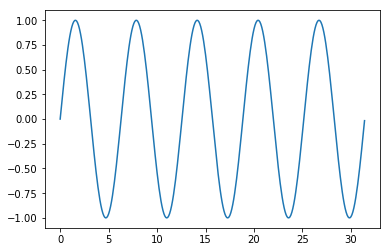

In [13]:
%matplotlib inline
plt.plot(x,y)

A partir de este momento, siempre tendremos activo este tipo de representación. Si queremos una representación más vistosa, podemos utilizar el magic `%matplotlib notebook`, aunque los resultados en este caso aparecerían siempre en la misma figura. Tú decides cómo prefieres mostrarlos. 

Ahora, crea dos señales trigonométricas diferentes, un seno con frecuencia $\omega_1=0.1$ y un coseno con frecuencia $\omega_2=0.5$, y muéstralos sobre los mismos ejes: 

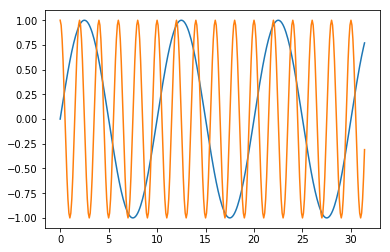

In [16]:
x = np.arange(0,10*np.pi,0.1)
y1 = np.sin(2*np.pi*0.1*x)
y2 = np.cos(2*np.pi*0.5*x)
plt.plot(x,y1)
plt.plot(x,y2)

## Cálculo del problema cinemático directo
Con las herramientas tan simples que hemos utilizado en esta fase anterior, podemos ya realizar un análisis de problemas robóticos. Por ejemplo, podríamos dibujar los 21 puntos de la trayectoria que recorre un efector de un **manipulador tipo RR** (por Rotación-Rotación, es decir, sus dos articulaciones son de rotación). 

![Imagen del Manipulador RR](ManipuladorRR.png)


Supongamos que sus enlaces tienen longitud $L_1 = L_2 = 1$, y las variables de rotación $\theta_1$ y $\theta_2$ varían uniformemente de 0 a $\pi/2$. Sabemos que las ecuaciones de la trayectoria son las siguientes: 
$$p_x = L_1\cos(\theta_1) + L_2\cos(\theta_1+\theta_2)$$
$$p_y = L_1\sin(\theta_1) + L_2\sin(\theta_1+\theta_2)$$

Podemos dibujar todos los puntos de la trayectoria mediante el código: 

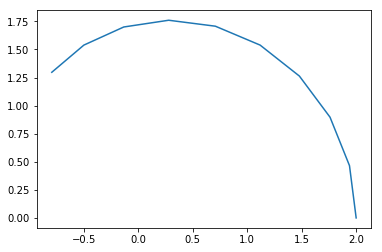

In [17]:
L1=1
L2=1
th1=np.arange(0, np.pi/2, np.pi/20)
th2=np.arange(0, np.pi/2, np.pi/20)
px=L1*np.cos(th1)+L2*np.cos(th1+th2)
py=L1*np.sin(th1)+L2*np.sin(th1+th2)
plt.plot(px,py)

## Función para el Problema Cinemático Directo
Cuando utilizamos algunas de las funciones varias veces, es conveniente definir funciones que realicen esa tarea, para conseguir una limpieza de código. En Jupyter, las funciones se definen de la misma forma que en Python convencional, es decir, utilizando el comando **def**. Para definir una función que calcule la trayectoria anterior podemos escribir: 

In [43]:
def pcd(L1, L2, th1, th2):
    px=L1*np.cos(th1)+L2*np.cos(th1+th2)
    py=L1*np.sin(th1)+L2*np.sin(th1+th2)
    p = np.array([px,py])
    return p

Al final, hemos juntado los vectors `px` y `py` en una matriz de tipo NumPy array, para poder trabajar mejor con ellos. De este modo, el código anterior nos quedaría:

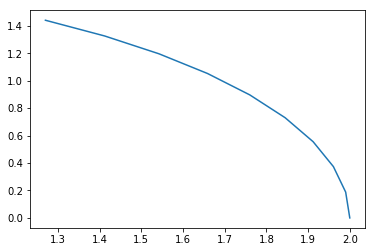

In [44]:
p = pcd(1,1,th1, th2)
plt.plot(p[0,:], p[1,:])

Podríamos también utilizar plot usando solo `plt.plot(p[0], p[1])`, pero por coherencia interna, se prefiere ser lo más explícito posible. 

## Configuración espacial del robot
Hasta ahora sólo hemos dibujado la trayectoria que sigue el efector del robot. Sin embargo, nos puede ser de utilidad ver la configuración que sigue el robot en cada momento de la trayectoria. Para ello, podemos crear una función que nos muestre el robot, dados los parámetros del robot $L_1$, $\theta_1$ y la posición del efector. Esta función tendría una forma similar a: 

In [45]:
def robot(L1,th1,p):
    x=[0, L1*np.cos(th1), p[0]]
    y=[0, L1*np.sin(th1), p[1]]
    plt.plot(x,y, color='k', linewidth=2)
    plt.axis([-2, 2, -2, 2])

El código anterior muestra una línea que va desde el origen de coordenadas $(0,0)$ donde está situada la primera articulación $J_1$ hasta la segunda articulación del robot $J_2$, y luego hasta el punto final del mismo. Hemos aumentado el grosor de esta línea y cambiado el color a negro (k) para diferenciarlo bien de la trayectoria. El comando `plt.axis()` nos permite mantener la misma proporción en los ejes $x$ e $y$ todo el rato. 

Ahora podemos probar a pintar el robot con una determinada configuración espacial, por ejemplo, $\theta_1=30^{\circ}$ y $\theta_2=60^{\circ}$. 

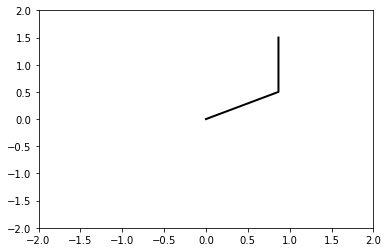

In [60]:
th1 = 30*np.pi/180
th2 = 60*np.pi/180
p = pcd(L1,L2,th1,th2)
robot(L1,th1,p)

Ahora podemos mezclar las dos imágenes, representando la trayectoria hasta un determinado punto y el brazo robótico en dicho punto. Completa el siguiente código para hacerlo. Recuerda que para pintar el robot solo tenemos que darle el último valor de `th1` y de `p`

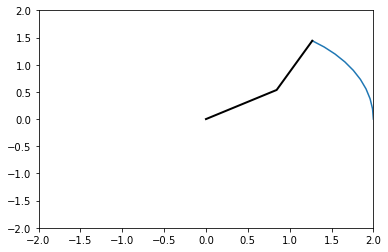

In [66]:
L1=1
L2=1
punto = 20
Npuntos = 50
th1=np.arange(0, punto*np.pi/(2*Npuntos), np.pi/Npuntos)
th2=np.arange(0, punto*np.pi/(2*Npuntos), np.pi/Npuntos)
p = pcd(L1,L2,th1,th2)
plt.plot(p[0,:], p[1,:])
robot(L1, th1[-1], p[:,-1])

## Trazado de la Trayectoria
A RELLENAR

## Problema Cinemático Inverso
Quizá te habrás preguntado si conocer de antemano las variables de articulación es lo normal. Por supuesto que no. Normalmente, el problema es precisamente conocer las variables de articulación a partir del punto donde queremos que esté el actuador del robot. Esto es lo que se conoce como **Problema Cinemático Inverso** (PCI). Las ecuaciones del PCI para el robot RR son: 

$$ \cos\theta_2 = \frac{x^2+y^2-L_1^2 -L_2^2}{2L_1 L_2}$$

$$ \tan\theta_1 = \frac{y(L_1 + L_2\cos\theta_2)-xL_2\sin\theta_2}{x(L_1 + L_2\cos\theta_2)+yL_2\sin\theta_2}$$

Ahora vamos a representar trayectorias. Para ello utilizaremos una aproximación de trayectoria rectilínea. De esta forma, los puntos por los que pasa el actuador se pueden parametrizar como: 

$$ x_n = x_{ini} + \frac{x_{fin}-x_{ini}}{N}n$$

$$ y_n = y_{ini} + \frac{y_{fin}-y_{ini}}{N}n$$

donde $n=0,1\dots N$ y $n$ representa el numero de punto en una trayectoria de `N+1` puntos. 

**Ahora vamos a escribir un programa que simule el movimiento del robot y dibuje la trayectoria (similar al realizado en el apartado anterior) para un movimiento rectilíneo entre dos puntos cualesquiera. Para ello, se utilizara la función `robot` de los apartados anteriores y se construira una nueva función `pci` que implemente las ecuaciones del PCI.  Debe tenerse en cuenta que las funciones `np.arccos` y `np.arctan` de NumPy toman valores en los intervalos $(0, \pi)$ y $(-\pi/2,\pi/2)$ respectivamente**. 

In [82]:
def pci(L1,L2,x,y):
    costh2 = (x**2+y**2-L1**2-L2**2)/(2*L1*L2)
    th2 = np.arccos(costh2)
    th1 = np.arctan((y*(L1+L2*costh2)-x*L2*np.sin(th2))/(x*(L1+L2*costh2)+y*L2*np.sin(th2)))
    return np.array([th1,th2])

Probaremos las siguientes trayectorias: 

- $(x_{ini}, y_{ini})=(2,0)$ y $(x_{fin}, y_{fin})=(0,2)$

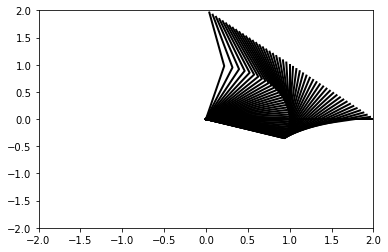

In [92]:
pini = np.array([2,0])
pfin = np.array([0,2])
N=50
for n in range(N):
    p = pini+(pfin-pini)*n/N
    th = pci(L1,L2,p[0],p[1])
    robot(L1,th[0],p)
    

- $(x_{ini}, y_{ini})=(1,1)$ y $(x_{fin}, y_{fin})=(-1,0)$. 

In [94]:
# Define aquí tu nueva función pci2
def pci2(L1,L2,x,y):
    costh2 = (x**2+y**2-L1**2-L2**2)/(2*L1*L2)
    th2 = np.arccos(costh2)
    th1 = np.arctan2(y*(L1+L2*costh2)-x*L2*np.sin(th2),x*(L1+L2*costh2)+y*L2*np.sin(th2))
    return np.array([th1,th2])

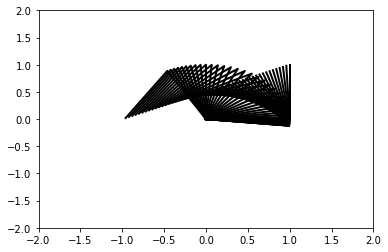

In [97]:
pini = np.array([1,1])
pfin = np.array([-1,0])
N=50
for n in range(N):
    p = pini+(pfin-pini)*n/N
    th = pci2(L1,L2,p[0],p[1])
    robot(L1,th[0],p)

Diagnosticar los posibles problemas de continuidad y corregir la función `pci` para solventarlos. Para ello, debe tenerse en cuenta que la funcion `np.arctan` no determina correctamente el cuadrante del angulo solución, por lo que debe sustituirse por `np.arctan2`. Defina aquí su nueva función `pci2` realizando esta estimación y vuelva a calcular la trayectoria: 

- $(x_{ini}, y_{ini})=(1,1)$ y $(x_{fin}, y_{fin})=(-1,0)$. 